## DataFrame Oluşturma

```python
{'reklam_giderleri': reklam_giderler, 'satislar': satislar}
```

DataFrame oluştururken bir **sözlük (dictionary)** kullanıyoruz.

- Sözlükteki **anahtarlar (keys)** sütun isimlerini temsil eder.
- Sözlükteki **değerler (values)** ise o sütundaki verileri içerir.

- Key (Anahtarlar) -> `'reklam_giderleri'` ve `'satislar'`
- Value (Değerler) -> `reklam_giderleri` ve `satislar` değişkenlerinin içerdiği veri

### Açıklamalar:

- **`reklam_giderleri`** sütunu, `reklam_giderler` adlı değişkende bulunan verileri içerir.
- **`satislar`** sütunu ise `satislar` adlı değişkende bulunan verileri içerir.

Bu yapı, Pandas DataFrame kullanarak **veri analizi ve makine öğrenimi** süreçlerinde kullanmak için idealdir. 



In [ ]:
import pandas as pd
import numpy as np #NumPy: Sayısal hesaplamalar ve çok boyutlu diziler (arrays) için kullanılır.
import matplotlib.pyplot as plt #Matplotlib: Veri görselleştirme ve grafik çizimi için kullanılır.
from sklearn.linear_model import LinearRegression # Lineer regresyon fonksiyonu - Değişkenler arasında doğrusal ilişki olan model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error #Performans ölçümleri için
from sklearn.model_selection import train_test_split # Verileri test ve eğitim olarak ikiye ayırmak için

# Veriler
reklam_giderler = np.array([7,11,15,22,26,28,31]) # x
satislar = np.array([223,215,233,264,305,316,320]) # y

# Pandas: veriyi temizlemek, dönüştürmek, analiz etmek ve görselleştirmek için en güçlü ve en yaygın kullanılan Python kütüphanelerinden biridir. 
# Verilerin pandasa dönüştürülmesi
df = pd.DataFrame({'reklam_giderleri': reklam_giderler, 'satislar': satislar}) #DataFrame: satır ve sütunlardan oluşan, tablo formatında bir veri yapısıdır.
df

,reklam_giderleri,satislar
0,7,223
1,11,215
2,15,233
3,22,264
4,26,305
5,28,316
6,31,320


In [32]:
# Index sütununu yıllara göre verelim
df.index = ['2001', '2002', '2003', '2004', '2005', '2006', '2007']
df

,reklam_giderleri,satislar
2001,7,223
2002,11,215
2003,15,233
2004,22,264
2005,26,305
2006,28,316
2007,31,320


Text(0, 0.5, 'Satış Giderleri')

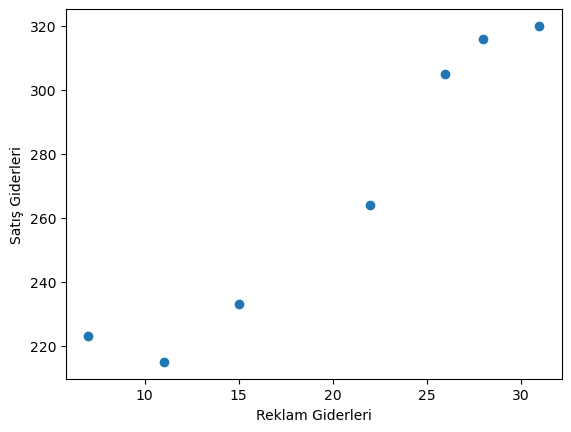

In [33]:
#Verilerin dağılım grafiği
plt.scatter(x=reklam_giderler,y=satislar)
plt.xlabel('Reklam Giderleri')
plt.ylabel('Satış Giderleri')

## `plt.errorbar(x, y, yerr=...)`
- `x = reklam_giderler` -> x eksenine reklam giderlerini koyuyoruz.
- `y = reklam_giderler*5+3` -> Basit bir doğrusal fonksiyon (y = 5x + 3) kullanarak tahmini satış değerlerini oluşturuyoruz.
- `yerr = np.abs(reklam_giderler*5+3-satislar)` -> Gerçek satış değerleri (satislar) ile tahmin edilen değerler (5x+3) arasındaki farkları alıp hata çubukları olarak çiziyoruz.
Matplotlib'in errorbar fonksiyonunu kullanarak hata çubukları (error bars) içeren bir grafik çizilir.

<ErrorbarContainer object of 3 artists>

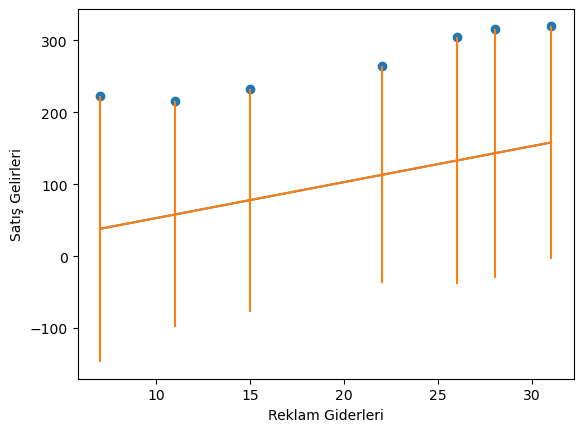

In [34]:
# deneme amaçlı x*5+3 denkleminin grafiği, reklam_giderler*5+3 tahmin değerleri
plt.scatter(x=reklam_giderler,y=satislar)
plt.xlabel("Reklam Giderleri")
plt.ylabel("Satış Gelirleri")
plt.plot(reklam_giderler, reklam_giderler*5+3)
plt.errorbar(reklam_giderler, reklam_giderler*5+3, yerr=np.abs(reklam_giderler*5+3-satislar)) #Hata değeri negatif olmaması için abs() fonksiyonu kullanıldı. yerr değerleri negatif olsa bile mutlak değer alındığından hata oluşmaz.

<ErrorbarContainer object of 3 artists>

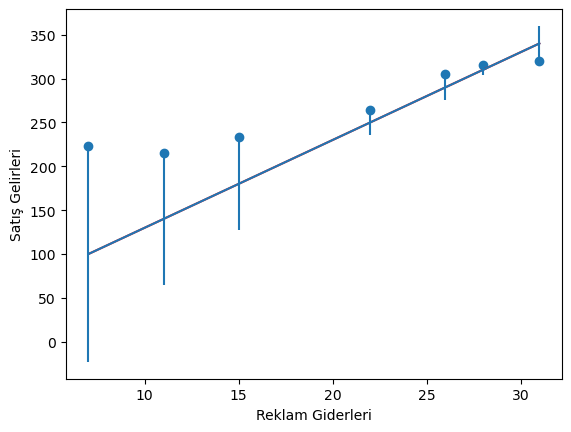

In [35]:
# uzak kaldığı için x*10+30 deneyelim.
plt.scatter(x=reklam_giderler, y=satislar)
plt.xlabel('Reklam Giderleri')
plt.ylabel('Satış Gelirleri')
plt.plot(reklam_giderler, reklam_giderler*10+30, color='red') 
plt.errorbar(reklam_giderler, reklam_giderler*10+30, yerr=np.abs(reklam_giderler*10+30-satislar))

Rastgele çizilen çizginin hataları fazla olacaktır. O nedenle bir öğrenme algoritması ile verilerin öğrenilmesi çalışması yapabiliriz.

In [36]:
lineer_model = LinearRegression()

**Modeli Oluştururken Kullanılacak Fonksiyonlar**
- fit(): Parametrelerin hesaplanmasını sağlar. Modele öğren demektir.
- transform(): Modelin veri setine uygulanmasını sağlar.
- fit_transform(): Fit ve Transform fonksiyonlarını birlikte sunar.

In [37]:
# numpy'da tablo olduğunu belirtebilmemiz için yukarıdan aşağıya doğru dönüşüm yapılması gerekiyor.
reklam_giderler = reklam_giderler.reshape(-1,1)
reklam_giderler

array([[ 7],
       [11],
       [15],
       [22],
       [26],
       [28],
       [31]])

In [38]:
# beta_0 ve beta_1 i belirle
lineer_model.fit(reklam_giderler, satislar) #lineer_model.fit() fonksiyonuyla reklam_giderler ve satislar arasında bir lineer regresyon modeli kuruldu

LinearRegression()

In [39]:
# beta_0,1 i yazdır
print('beta_0= {} beta_1 = {}'.format(lineer_model.intercept_,
                                      lineer_model.coef_[0]))

beta_0= 171.72 beta_1 = 4.814


In [40]:
# Modelin r2 skoru
lineer_model.score(reklam_giderler, satislar)

0.9305571795695471

Öğrenme performansından memnun isek tahmin aşamasına geçilebilir. Tahmin için kullanacağımız fonksiyon
- predict(): Predict using the linear model.


Tahmin edilen değerler aşağıdaki gibidir.

In [41]:
lineer_model.predict(reklam_giderler) #Tahmini değerler

array([205.418, 224.674, 243.93 , 277.628, 296.884, 306.512, 320.954])

In [42]:
# Gerçek değerler
satislar

array([223, 215, 233, 264, 305, 316, 320])

In [43]:
# Hatalar (Errors)
satislar_tahmin = lineer_model.predict(reklam_giderler)
hatalar = satislar_tahmin - satislar
hatalar

array([-17.582,   9.674,  10.93 ,  13.628,  -8.116,  -9.488,   0.954])

In [44]:
# Hataların toplamı
hatalar.sum()

2.842170943040401e-14

In [45]:
# Hataların toplamı ortalaması
hatalar.sum().round()
# En küçük kareler metoduyla hataların toplamını 0 bekleriz.

0.0

In [46]:
# hataların karesi
hatalarin_karesi = np.square(hatalar) #numpy kullanıldı
hatalarin_karesi

array([309.126724,  93.586276, 119.4649  , 185.722384,  65.869456,
        90.022144,   0.910116])

In [47]:
# Ortalama Karesel Hatalar (MSE - Mean Squared Error)
mse = np.mean(hatalarin_karesi) #numpy kullanıldı
mse

123.52885714285706

In [48]:
# Scikit-learn ile MSE
mean_squared_error(satislar, satislar_tahmin) #mean_squared_error(gercekYDegerleri,tahminiYDegerleri)

123.52885714285706

In [49]:
# Ortalama Mutlak Hatalar (MAE - Mean Absolute Error)
mae = np.mean(np.abs(hatalar)) # np.abs: Numpy kütüphanesinde bulunan bir fonksiyondur verilen sayıların mutlak değerini alır.
print(mae)

10.053142857142856


In [50]:
# Scikit-learn ile MAE
mean_absolute_error(satislar, satislar_tahmin)

10.053142857142856

In [51]:
# Ortalama Karesel Hataların Karekökü (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse) # Çok büyük değerler oluştuğunda küçültmek için karekök alınır.
rmse

11.114353653850369

In [52]:
# Scikit-learn ile RMSE
mean_squared_error(satislar, satislar_tahmin, squared=False)

11.114353653850369

**Bias ve Varyans**

Varyans, gerçek değerlerin tahmin edilen değerlerin ortalamasından ne kadar saptığını gösterir. r2 skoru ile seviyesi hesaplanır. MSE ile alakalıdır.

In [53]:
varyans = np.var(hatalar)
varyans

123.52885714285706

**score()**: Gerçek değerler ile tahmin değerleri arasındaki hataları karşılaştırır.
**r2 skoru**
bağımsız değişkenin öngörebildiği bağımlı değişkendeki varyans oranı

diğer tanımla;

(model tarafından açıklanan toplam varyans) / toplam varyans

$𝑅^2=1−\frac{\sum𝑒_𝑖^2}{\sum(𝑌−\overline{𝑌})^2}$


In [54]:
r2_skoru = 1 - (hatalarin_karesi /
                ((satislar - satislar.mean())**2).sum()).sum()
r2_skoru

0.9305571795695471

In [55]:
# Scikitlearn içerisinde r2 score
r2_score(satislar, satislar_tahmin)

0.9305571795695471

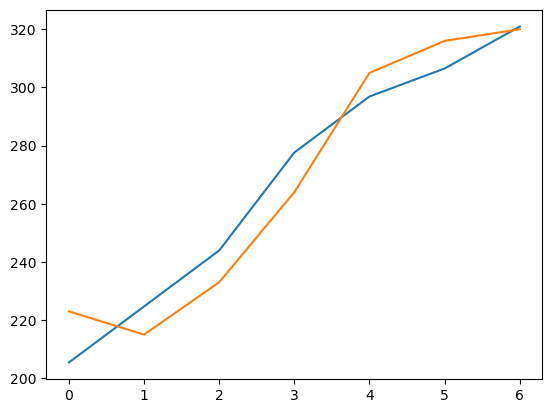

In [56]:
# Sonuçların görselleştirilmesi
plt.plot(satislar_tahmin)
plt.plot(satislar)

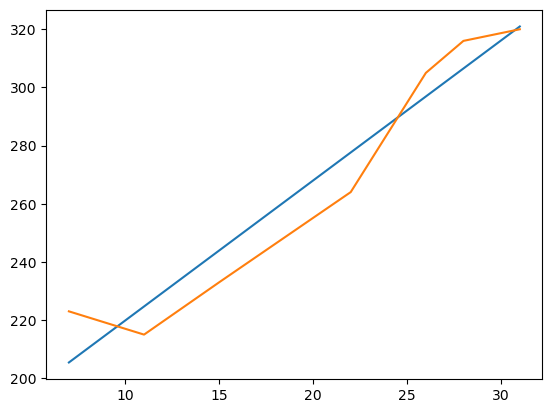

In [57]:
# x değerlerini verelim.
plt.plot(reklam_giderler, satislar_tahmin)
plt.plot(reklam_giderler, satislar)

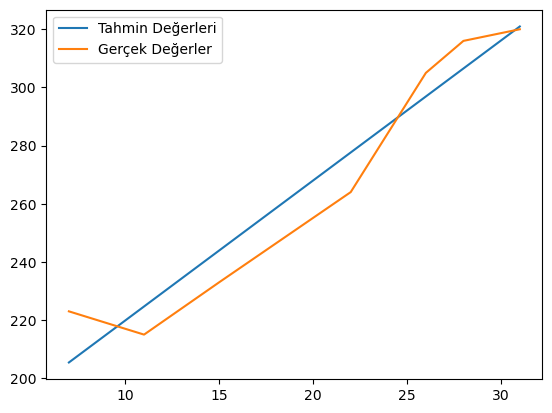

In [58]:
# etiketlerin eklenmesi
plt.plot(reklam_giderler, satislar_tahmin, label='Tahmin Değerleri')
plt.plot(reklam_giderler, satislar, label='Gerçek Değerler')
plt.legend()

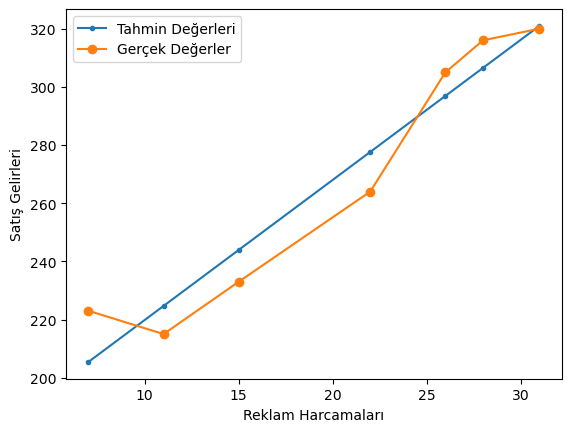

In [59]:
# Marker eklenmesi
plt.plot(reklam_giderler, satislar_tahmin, label='Tahmin Değerleri', marker='.')
plt.plot(reklam_giderler, satislar, label='Gerçek Değerler', marker='o')
plt.xlabel('Reklam Harcamaları')
plt.ylabel('Satış Gelirleri')
plt.legend()

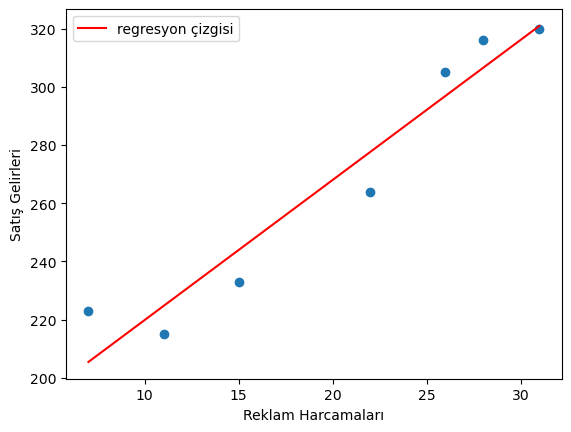

In [60]:
# regresyon çizgisi
plt.scatter(x=reklam_giderler,y=satislar)
plt.plot(reklam_giderler, reklam_giderler*lineer_model.coef_[0]+lineer_model.intercept_, color='red', label='regresyon çizgisi')
plt.xlabel('Reklam Harcamaları')
plt.ylabel('Satış Gelirleri')
plt.legend()